## CIFAR10 Dataset 신경망으로 훈련

#### import

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

#### 데이터 적재

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

#### 데이터 시각화

In [5]:
train_labels = train_labels.flatten()

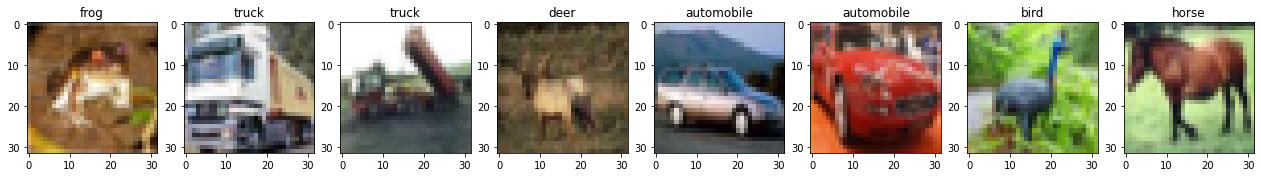

In [6]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)

for i in range(8):
    axes[i].imshow(train_images[i])
    axes[i].set_title(class_names[train_labels[i]])

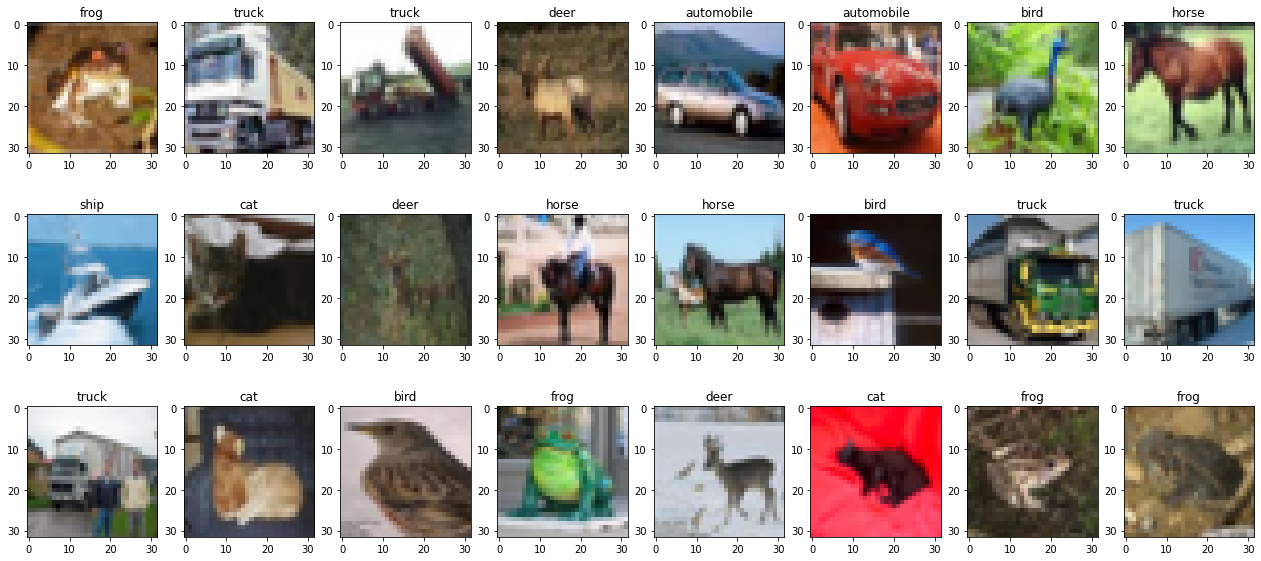

In [7]:
plt.figure(figsize = (22,10))

for i in range(24):
    ax = plt.subplot(3, 8, i+1)
    ax.set_title(class_names[train_labels[i]])
    ax.imshow(train_images[i])

#### 데이터 전처리

In [8]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

#### 모델 생성

In [12]:
clear_session()
input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(rate=0.3)(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(rate=0.3)(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       590080

In [13]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_oh_labels, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 34s 98ms/step - loss: 1.7224 - accuracy: 0.3697 - val_loss: 1.3465 - val_accuracy: 0.5169
Epoch 2/30
313/313 [==============================] - 29s 93ms/step - loss: 1.2907 - accuracy: 0.5353 - val_loss: 1.0598 - val_accuracy: 0.6278
Epoch 3/30
313/313 [==============================] - 29s 93ms/step - loss: 1.0929 - accuracy: 0.6122 - val_loss: 1.0134 - val_accuracy: 0.6386
Epoch 4/30
313/313 [==============================] - 29s 92ms/step - loss: 0.9679 - accuracy: 0.6581 - val_loss: 0.8423 - val_accuracy: 0.7028
Epoch 5/30
313/313 [==============================] - 29s 93ms/step - loss: 0.8704 - accuracy: 0.6933 - val_loss: 0.7621 - val_accuracy: 0.7307
Epoch 6/30
313/313 [==============================] - 29s 93ms/step - loss: 0.7999 - accuracy: 0.7167 - val_loss: 0.7366 - val_accuracy: 0.7384
Epoch 7/30
313/313 [==============================] - 29s 93ms/step - loss: 0.7434 - accuracy: 0.7397 - val_loss: 0.6953 - val_accuracy:

In [15]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 2s 28ms/step - loss: 0.7508 - accuracy: 0.7952


[0.7508460283279419, 0.795199990272522]

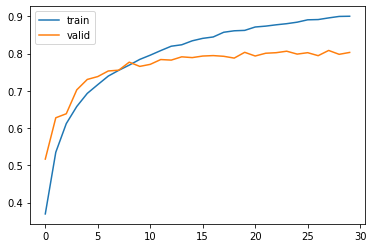

In [16]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

#### 가중치 초기값 변경

In [17]:
clear_session()
input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

In [18]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_oh_labels, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 11s 33ms/step - loss: 1.8154 - accuracy: 0.3176 - val_loss: 1.4105 - val_accuracy: 0.4799
Epoch 2/30
313/313 [==============================] - 10s 31ms/step - loss: 1.3576 - accuracy: 0.5067 - val_loss: 1.1143 - val_accuracy: 0.5932
Epoch 3/30
313/313 [==============================] - 10s 31ms/step - loss: 1.1452 - accuracy: 0.5962 - val_loss: 0.9873 - val_accuracy: 0.6579
Epoch 4/30
313/313 [==============================] - 10s 31ms/step - loss: 0.9880 - accuracy: 0.6545 - val_loss: 0.8692 - val_accuracy: 0.6965
Epoch 5/30
313/313 [==============================] - 10s 31ms/step - loss: 0.8858 - accuracy: 0.6911 - val_loss: 0.8398 - val_accuracy: 0.7004
Epoch 6/30
313/313 [==============================] - 10s 31ms/step - loss: 0.7980 - accuracy: 0.7248 - val_loss: 0.7835 - val_accuracy: 0.7258
Epoch 7/30
313/313 [==============================] - 10s 31ms/step - loss: 0.7312 - accuracy: 0.7479 - val_loss: 0.7415 - val_accuracy:

In [20]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 12ms/step - loss: 0.8276 - accuracy: 0.7914


[0.8276398181915283, 0.7914000153541565]

#### 배치 정규화

In [21]:
from tensorflow.keras.layers import BatchNormalization, Activation

In [22]:
clear_session()
input_tensor = Input(shape=(32, 32, 3))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0     

In [27]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = ModelCheckpoint("my_keras_cifar10.h5", save_best_only=True, verbose=1)
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
313/313 [==============================] - 14s 40ms/step - loss: 0.1590 - accuracy: 0.9481 - val_loss: 1.2341 - val_accuracy: 0.7372

Epoch 00001: val_loss improved from inf to 1.23407, saving model to my_keras_cifar10.h5
Epoch 2/20
313/313 [==============================] - 12s 39ms/step - loss: 0.1502 - accuracy: 0.9488 - val_loss: 0.7166 - val_accuracy: 0.8195

Epoch 00002: val_loss improved from 1.23407 to 0.71660, saving model to my_keras_cifar10.h5
Epoch 3/20
313/313 [==============================] - 12s 39ms/step - loss: 0.1402 - accuracy: 0.9538 - val_loss: 0.7672 - val_accuracy: 0.8099

Epoch 00003: val_loss did not improve from 0.71660
Epoch 4/20
313/313 [==============================] - 12s 38ms/step - loss: 0.1347 - accuracy: 0.9555 - val_loss: 0.8556 - val_accuracy: 0.8035

Epoch 00004: val_loss did not improve from 0.71660
Epoch 5/20
313/313 [==============================] - 12s 38ms/step - loss: 0.1232 - accuracy: 0.9596 - val_loss: 1.0369 - val_accuracy: 0

In [30]:
model = load_model("my_keras_cifar10.h5")
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 15ms/step - loss: 0.7911 - accuracy: 0.8129


[0.791085958480835, 0.8129000067710876]